#**What is data preprocessing?**

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format.


**Load the library to run the functions**





In [50]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from numpy import array 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

**Load the dataset**

In [51]:
from google.colab import files
uploaded = files.upload()

In [52]:
data_set = pd.DataFrame()
data_set_test = pd.DataFrame()
X = pd.DataFrame()
y = pd.DataFrame()
data_set =  pd.read_csv("train_cleaned.csv")
data_set.head(5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0


In [53]:
def loaddata(train,test):
  data_set =  pd.read_csv(train)
  data_set_test = pd.read_csv(test)
  print(data_set.head(5))
  X=data_set.drop(columns='label', axis = 1)
  y=data_set['label']
  return data_set,data_set_test,X,y

##1.**Correaltion analysis**







*   Correlation can help in predicting one attribute from another (Great way to impute missing values).
*   List itemCorrelation can (sometimes) indicate the presence of a causal relationship.




**X (train) , y(label)**

**Remove the highly correlated features : to each other**

Advantage: Reduces noise 

###1.1**Function to remove highly correlated data**

In [54]:
def removeHcorrFeature(percentage):
  # Selecting all the features with high correlation values with other features
  # Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
  corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find index of feature columns with correlation greater than 0.9
  o_drop = [column for column in upper.columns if any(upper[column] > percentage)]
  print(o_drop)
  return o_drop

#2.**Feature Engineering**

Feature engineering is useful to improve the performance of machine learning algorithms and is often considered as applied machine learning. Features are also referred to as ‘variables’ or ‘attributes’ as they affect the output of a process.




###2.1**Function to create new features**

In [55]:
def createNewFeatures():
   # data_set['network_bytes'] = data_set['sbytes'] + data_set['dbytes']
    #data_set_test['network_bytes'] = data_set_test['sbytes'] + data_set_test['dbytes']
    #data_set.drop(columns=['sbytes','dbytes'])
    #data_set_test.drop(columns=['sbytes','dbytes'])
    print(X)
    print("done")

#3.**Feature elimination**


**RFE is an efficient approach for eliminating features from a training dataset for feature selection.**

###3.1**SelectKbest**

**Function for SelectKbest**

In [56]:
def applySelectKBest(K,X,y):
  select = SelectKBest(score_func=f_regression, k=K)
  print(X)
  z = select.fit_transform(X, y) 
  print("After selecting best  features:", z)  
  filter = select.get_support()
  features = X.columns
  print("All features:")
  print(features)
  print(features[filter])
  #return features[filter]

###3.2**Recursive Elimination**

**Function for Backward Elimination**

In [57]:
def RFE():

  # Build a classification task using 3 informative features
    X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
     random_state=0,
    )   

# Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

    min_features_to_select = 1 
    rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    print(plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
     ))
    print(plt.show())

#4.**Principle component Analysis**








###4.1**Functions for applying PCA method**

In [66]:
def applyPCA(data_set, n_com):
   pca = PCA(n_components=n_com).fit(data_set)
   X_train_pca = pca.transform(data_set)
   print(pca.n_components_)
   return X_train_pca

#5.**Feature Scaling**





###5.1**MinMaxScaling**

**Function for min max scaling**

In [71]:
def applyMinMax():  
# scale features
  scaler = MinMaxScaler()
  model=scaler.fit(data_set)
  scaled_data=model.transform(data_set)
  print(data_set)
  

###5.2**Standard Scaling** 

**Function for standard scaling**

In [72]:
def applyStandardScaler():
  scaler = StandardScaler()
  model = scaler.fit(data_set)
  scaled_data = model.transform(data_set)
  print(data_set)


# Main function 

Load the data
        dur  spkts  dpkts  ...  ct_srv_dst  is_sm_ips_ports  label
0  0.000011      2      0  ...           2                0      0
1  0.000008      2      0  ...           2                0      0
2  0.000005      2      0  ...           3                0      0
3  0.000006      2      0  ...           3                0      0
4  0.000010      2      0  ...           3                0      0

[5 rows x 40 columns]
**************************************************************************************************************
Create new feature
Empty DataFrame
Columns: []
Index: []
done
**************************************************************************************************************
Remove highly correlated features with each other
[]
**************************************************************************************************************
Feature selection:SelectKbest
            dur  spkts  dpkts  ...  ct_src_ltm  ct_srv_dst  is_sm_ips_ports
0      

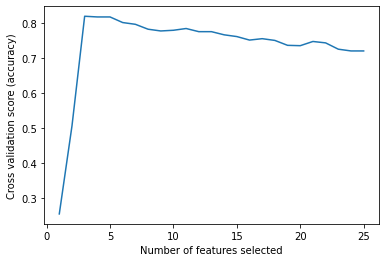

None
**************************************************************************************************************
Apply Principle component analysis
2
**************************************************************************************************************
Apply MinMax scaler
            dur  spkts  dpkts  ...  ct_srv_dst  is_sm_ips_ports  label
0      0.000011      2      0  ...           2                0      0
1      0.000008      2      0  ...           2                0      0
2      0.000005      2      0  ...           3                0      0
3      0.000006      2      0  ...           3                0      0
4      0.000010      2      0  ...           3                0      0
...         ...    ...    ...  ...         ...              ...    ...
82327  0.000005      2      0  ...           1                0      0
82328  1.106101     20      8  ...           2                0      0
82329  0.000000      1      0  ...           1                1      0
82330 

In [73]:
def main():
  # create variables to store the return value
    col=[]
    col_selectkbest=[]
    col_backward=[]

    col_forward=[]
    K=10
    n_com= 0.99
  
    print("Load the data")
    data_set,data_set_test,X,y = loaddata("train_cleaned.csv","test_cleaned.csv")
    print("**************************************************************************************************************")

    print("Create new feature")
    createNewFeatures()
    print("**************************************************************************************************************")

    print("Remove highly correlated features with each other")
    col = removeHcorrFeature(0.99)
    print("**************************************************************************************************************")

    print("Feature selection:SelectKbest")
    applySelectKBest(K,X,y)
     
    print("**************************************************************************************************************")
  
    print("Feature selection:Backward elimination")
    col_backward = RFE()
    print(col_backward)
    print("**************************************************************************************************************")

    print("Apply Principle component analysis")
    applyPCA(data_set, n_com)
    print("**************************************************************************************************************")

    print("Apply MinMax scaler")
    applyMinMax()
    print("**************************************************************************************************************")

    print("Apply Standard scaler")
    applyStandardScaler()
    print("**************************************************************************************************************")


    print("The final train data")
    print(data_set.head(5))
    print("**************************************************************************************************************")

    print("The final test data")
    print(data_set_test.head(5))
    print("**************************************************************************************************************")
     

main()

#6.**Save the preprocessed file**

In [ ]:

data_set.head(5)